# Evaluate model performance with word2vec distance

In [6]:
! pip install POT
import pandas as pd
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import seaborn as sns
import ot

# Load the Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Set model number and file paths
model_number = 4
finetuned_result = f"model_{model_number}/finetuned_results.csv"
pretrained_result = f"model_{model_number}/pretrained_results.csv"

# Define a function to calculate Word Mover's Distance and format output
def calculate_and_format(row):
    distance = model.wmdistance(row['Source Text'], row['Predicted Neutral Text'])
    output = f"Sample: {row.name}\nSource Text: {row['Source Text']}\nPredicted Neutral Text: {row['Predicted Neutral Text']}\nWord Mover's Distance: {distance}\n\n"
    return distance, output

In [7]:
df_finetuned = pd.read_csv(finetuned_result, encoding='ISO-8859-1')

# Apply the function to each row of the DataFrame
df_finetuned['wmdistance'], outputs = zip(*df_finetuned.apply(calculate_and_format, axis=1))

# Write the outputs to the file
with open(f'model_{model_number}/output_word2vec_finetuned.txt', 'w') as f:
    f.writelines(outputs)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_finetuned.shape[0]}")

# Print the maximum Word Mover's Distance
max_distance = df_finetuned['wmdistance'].max()
print(f"Maximum Word Mover's Distance: {max_distance}")

# Calculate and print the average Word Mover's Distance
average_distance = df_finetuned['wmdistance'].mean()
print(f"Average Word Mover's Distance: {average_distance}")

# Calculate and print the median Word Mover's Distance
median_distance = df_finetuned['wmdistance'].median()
print(f"Median Word Mover's Distance: {median_distance}")

Total number of sentence pairs used for calculation: 257
Maximum Word Mover's Distance: 0.3841467251736408
Average Word Mover's Distance: 0.0874129543283541
Median Word Mover's Distance: 0.06892595974931968


In [8]:
df_pretrained = pd.read_csv(pretrained_result, encoding='ISO-8859-1')

# Apply the function to each row of the DataFrame
df_pretrained['wmdistance'], outputs = zip(*df_pretrained.apply(calculate_and_format, axis=1))

# Write the outputs to the file
with open(f'model_{model_number}/output_word2vec_pretrained.txt', 'w') as f:
    f.writelines(outputs)

# Print the counts
print(f"Total number of sentence pairs used for calculation: {df_pretrained.shape[0]}")

# Print the maximum Word Mover's Distance
max_distance = df_pretrained['wmdistance'].max()
print(f"Maximum Word Mover's Distance: {max_distance}")

# Calculate and print the average Word Mover's Distance
average_distance = df_pretrained['wmdistance'].mean()
print(f"Average Word Mover's Distance: {average_distance}")

# Calculate and print the median Word Mover's Distance
median_distance = df_pretrained['wmdistance'].median()
print(f"Median Word Mover's Distance: {median_distance}")

Total number of sentence pairs used for calculation: 179
Maximum Word Mover's Distance: 0.6627682626788208
Average Word Mover's Distance: 0.29305029779357034
Median Word Mover's Distance: 0.36436424148204904


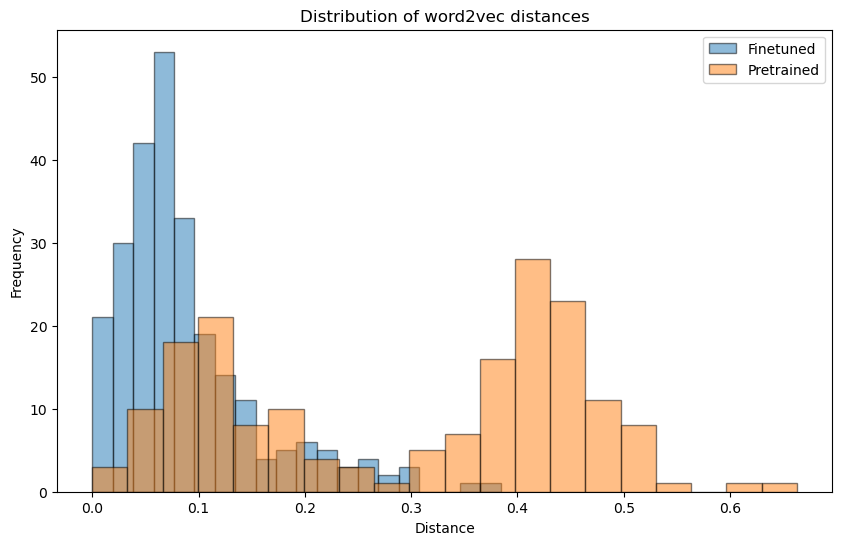

In [9]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a histogram of the BLEU scores for the finetuned model
plt.hist(df_finetuned['wmdistance'], bins=20, edgecolor='black', alpha=0.5, label='Finetuned')

# Plot a histogram of the BLEU scores for the pretrained model
plt.hist(df_pretrained['wmdistance'], bins=20, edgecolor='black', alpha=0.5, label='Pretrained')

# Add a title and labels
plt.title('Distribution of word2vec distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\10150\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


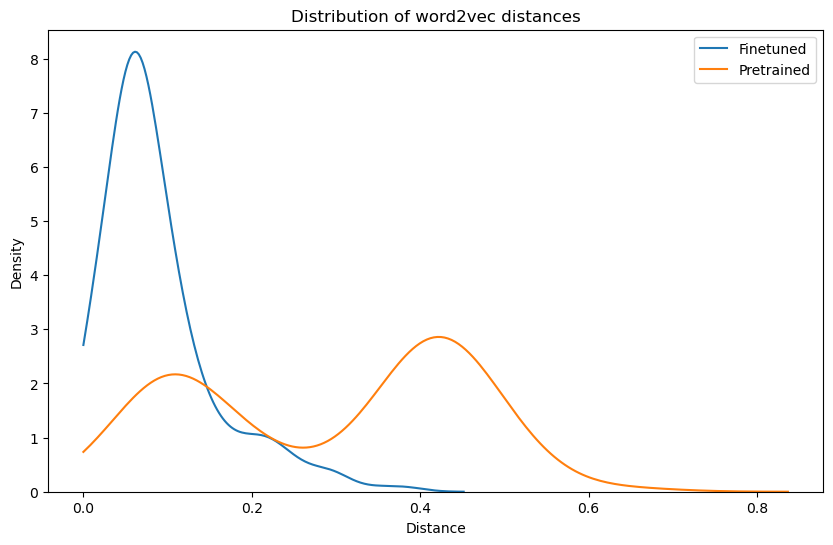

In [12]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Create a KDE plot for the WMD values of the finetuned model
sns.kdeplot(df_finetuned['wmdistance'], label='Finetuned', clip=(0, 1))

# Create a KDE plot for the WMD values of the pretrained model
sns.kdeplot(df_pretrained['wmdistance'], label='Pretrained', clip=(0, 1))

# Add a title and labels
plt.title('Distribution of word2vec distances')
plt.xlabel('Distance')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()